In [26]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [30]:
data = pd.read_csv("cars.csv")
dataX = data[['Volume','Weight']]
datay = data['CO2']
data

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


# linear model from sklearn

In [140]:
#set up the model and pridict target varibale
LRmodel = linear_model.LinearRegression()
LRmodel.fit(dataX,datay)
#show the coefficient values of weight and volume
LRmodel.coef_

array([0.00780526, 0.00755095])

# Use gradient descent algorithm

<IPython.core.display.Javascript object>


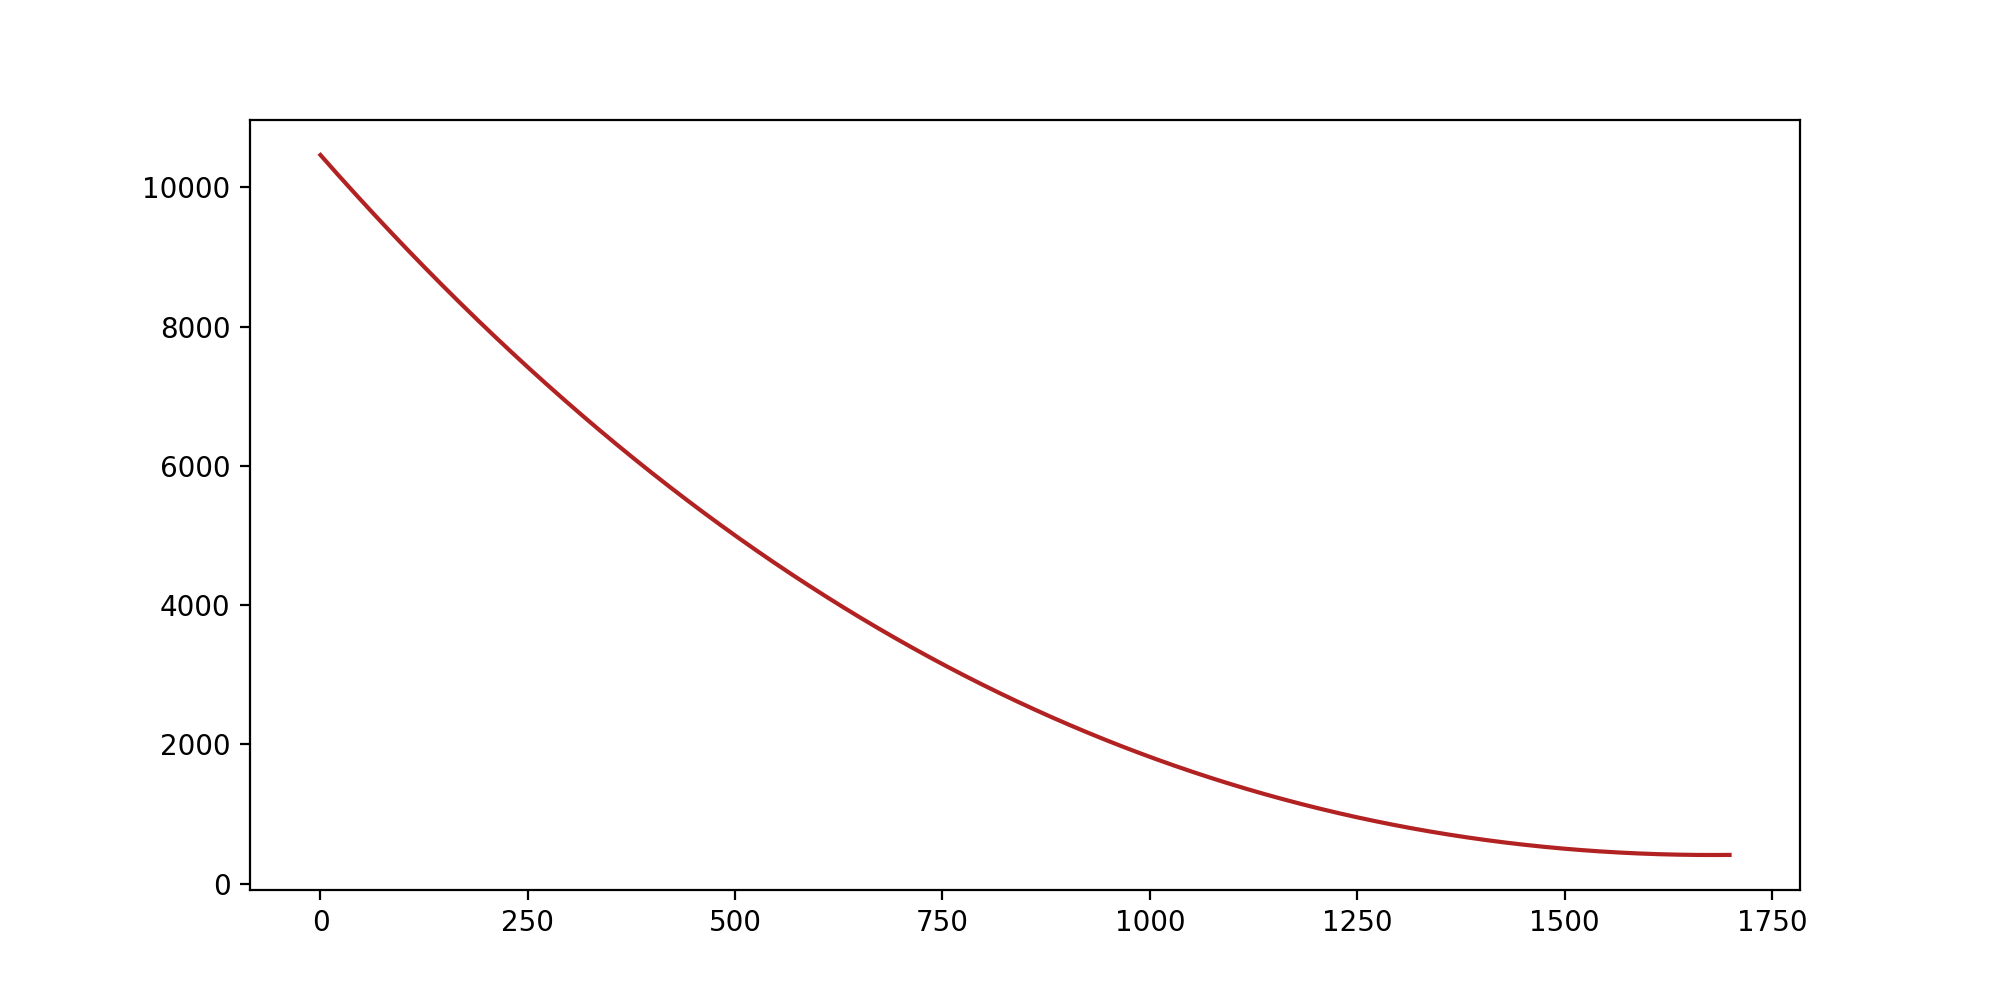

In [146]:
# get data from file
x1= np.genfromtxt('cars.csv',delimiter=',',skip_header=1,usecols=(2))
x2= np.genfromtxt('cars.csv',delimiter=',',skip_header=1,usecols=(3))
y = np.genfromtxt('cars.csv',delimiter=',',skip_header=1,usecols=(4))

# mean normalization
x1_ = (x1 - np.mean(x1))/np.max(x1)
x2_ = (x2 - np.mean(x2))/np.max(x2)
y_ = (y - np.mean(y))/np.max(y)

# creat a cost function/squared error function
def ErrorFunction(k0,k1,k2,x1,x2,y):
    totalError = 0
    m = len(y)
    for i in range(m):
        totalError += (1/m)*(k0*1+k1*x1[i]+k2*x1[i]-y[i])**2
    return totalError

#calculate any point's gradient
def CalculateGradient(x1,x2,y,Initialk0,Initialk1,Initialk2,LearningRate):
    Partialk0 = 0
    Partialk1 = 0
    Partialk2 = 0
    m = len(y)
    
    for i in range(m):
        Partialk0 += (Initialk0*1+Initialk1*x1[i]+Initialk2*x2[i]-y[i])*1
        Partialk1 += (Initialk0*1+Initialk1*x1[i]+Initialk2*x2[i]-y[i])*x1[i]
        Partialk2 += (Initialk0*1+Initialk1*x1[i]+Initialk2*x2[i]-y[i])*x2[i]
        
    Currentk0 = Initialk0 - (LearningRate/m)*Partialk0
    Currentk1 = Initialk1 - (LearningRate/m)*Partialk1
    Currentk2 = Initialk2 - (LearningRate/m)*Partialk2
    
    return (Currentk0,Currentk1,Currentk2)

#achieve gradient descent
def GradientDesecentOperator(x1,x2,y,Initialk0,Initialk1,Initialk2,LearningRate,num_iterations):
    for i in range(num_iterations):
        Initialk0,Initialk1,Initialk2=CalculateGradient(x1,x2,y,Initialk0,Initialk1,Initialk2,LearningRate)
    return Initialk0,Initialk1,Initialk2  
 
ErrorList = []
for i in range(1700):
    k0,k1,k2 = GradientDesecentOperator(x1_,x2_,y_,0,0,0,0.004,i)
    error  = ErrorFunction(k0,k1,k2,x1,x2,y)
    ErrorList.append(error)
    
fig, ax = plt.subplots(1, 1,figsize=(10, 5), dpi=100)
plt.plot(range(1700),ErrorList,color="firebrick")
plt.show()

In [152]:
#error and iteration time
# 1334.1476176729873(1500)
#428.85949884167525(1600)
#412.4032663648692(1700)

413.4633136728716

In [160]:
k0,k1,k2 = GradientDesecentOperator(x1_,x2_,y_,0,0,0,0.004,1700)
# real = 114 (volume = 2000,weight = 1725)
k0+2000*k1+1725*k2

114.82462323299441